In [2]:
from rdkit import Chem

frag = Chem.MolFromSmiles("CC(C)CC(C)O.CCC1=CC=CC=C1")
link = Chem.MolFromSmiles("CC#CN")
mol = Chem.MolFromSmiles("CCC1=C(NC#CCOC(C)CC(C)C)C=CC=C1")


bonds = list(mol.GetBonds())
match1 = mol.GetSubstructMatch(frag)
match2 = mol.GetSubstructMatch(link)
print(f"match1= {match1}")
print(f"match2= {match2}")
# 用于在排序时指定键的属性
def bond_sort_key(bond):
    return bond.GetIdx()


efrag = Chem.EditableMol(frag)
elink = Chem.EditableMol(link)

for bond in sorted(bonds, key=bond_sort_key, reverse=True):
    begin_atom = bond.GetBeginAtom()
    end_atom = bond.GetEndAtom()
    anchor = Chem.Atom('')

    if begin_atom.GetIdx() in match1 and end_atom.GetIdx() in match2:

        anchor11_idx = begin_atom.GetIdx()
        anchor11 = match1.index(anchor11_idx)
        print(f"atom11_idx= {anchor11_idx}")
        idx11 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor11, idx11, Chem.rdchem.BondType.SINGLE)
    
        anchor12_idx = end_atom.GetIdx()
        anchor12 = match2.index(anchor12_idx)
        print(f"atom12_idx= {anchor12_idx}")
        idx12 = elink.AddAtom(anchor)
        elink.AddBond(anchor12, idx12, Chem.rdchem.BondType.SINGLE)
        
    if begin_atom.GetIdx() in match2 and end_atom.GetIdx() in match1:

        anchor21_idx = begin_atom.GetIdx()
        anchor21 = match2.index(anchor21_idx)
        print(f"atom21_idx= {anchor21_idx}")
        idx21 = elink.AddAtom(anchor)
        elink.AddBond(anchor21, idx21, Chem.rdchem.BondType.SINGLE)
    
        anchor22_idx = end_atom.GetIdx()
        anchor22 = match1.index(anchor22_idx)
        print(f"atom22_idx= {anchor22_idx}")
        idx22 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor22, idx22, Chem.rdchem.BondType.SINGLE)


frag_with_anchors = efrag.GetMol()
link_with_anchors = elink.GetMol()

try:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors)
except RuntimeError:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors, canonical=False)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors, canonical=False)

print("Frag SMILES with anchors:", fraganchorsmi)
print("Link SMILES with anchors:", linkanchorsmi)


match1= (13, 12, 14, 11, 9, 10, 8, 0, 1, 2, 3, 15, 16, 17, 18)
match2= (7, 6, 5, 4)


[14:42:12] 

****
Post-condition Violation
Element '' not found
Violation occurred on line 93 in file /home/conda/feedstock_root/build_artifacts/rdkit_1651075169244/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****



RuntimeError: Post-condition Violation
	Element '' not found
	Violation occurred on line 93 in file Code/GraphMol/PeriodicTable.h
	Failed Expression: anum > -1
	RDKIT: 2022.03.2
	BOOST: 1_74


In [14]:
from rdkit import Chem
# CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1 C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1 CCNC
frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")

frag_atoms = frag.GetNumAtoms() if frag is not None else 0
link_atoms = link.GetNumAtoms() if link is not None else 0
mol_atoms = mol.GetNumAtoms() if mol is not None else 0

print(f"frag原子数量：{frag_atoms}")
print(f"link原子数量：{link_atoms}")
print(f"mol原子数量：{mol_atoms}")
# frag = Chem.MolFromSmiles("CC(C)CC(C)O.CCC1=CC=CC=C1")
# link = Chem.MolFromSmiles("CC#CN")
# mol = Chem.MolFromSmiles("CCC1=C(NC#CCOC(C)CC(C)C)C=CC=C1")

bonds = list(mol.GetBonds())
matches1 = mol.GetSubstructMatches(frag)
match1 = []
match2 = []
# frag_atom_indices = set(mol.GetSubstructMatch(frag))
# print(f'frag_atom_indices = {frag_atom_indices}')
matches2 = mol.GetSubstructMatches(link)
print(f"matches= {matches1, matches2}")
for match_1 in matches1:
    for match_2 in matches2:
        if not set(match_1).intersection(set(match_2)):
            match1.extend(match_1)
            match2.extend(match_2)
    # for atom_index in sorted(match, reverse=True):
    #     if not atom_index in frag_atom_indices:
    #         print(f'match = {match}')
    #         match2.append(match) 

print(f"match1= {match1}")
print(f"match2= {match2}")
# 用于在排序时指定键的属性
def bond_sort_key(bond):
    return bond.GetIdx()

efrag = Chem.EditableMol(frag)
elink = Chem.EditableMol(link)

for bond in sorted(bonds, key=bond_sort_key, reverse=True):
    begin_atom = bond.GetBeginAtom() 
    end_atom = bond.GetEndAtom()
    anchor = Chem.Atom('*')

    # anchorbegin_idx = begin_atom.GetIdx()
    # anchorend_idx = end_atom.GetIdx()
    # print(f'anchorbegin_idx anchorend_idx = {anchorbegin_idx, anchorend_idx}')

    if begin_atom.GetIdx() in match1 and end_atom.GetIdx() in match2:

        anchor11_idx = begin_atom.GetIdx()
        anchor11 = match1.index(anchor11_idx)
        print(f"atom11_idx= {anchor11_idx}")
        idx11 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor11, idx11, Chem.rdchem.BondType.SINGLE)
    
        anchor12_idx = end_atom.GetIdx()
        anchor12 = match2.index(anchor12_idx)
        print(f"atom12_idx= {anchor12_idx}")
        idx12 = elink.AddAtom(anchor)
        elink.AddBond(anchor12, idx12, Chem.rdchem.BondType.SINGLE)
        
    if begin_atom.GetIdx() in match2 and end_atom.GetIdx() in match1:

        anchor21_idx = begin_atom.GetIdx()
        anchor21 = match2.index(anchor21_idx)
        print(f"atom21_idx= {anchor21_idx}")
        idx21 = elink.AddAtom(anchor)
        elink.AddBond(anchor21, idx21, Chem.rdchem.BondType.SINGLE)
    
        anchor22_idx = end_atom.GetIdx()
        anchor22 = match1.index(anchor22_idx)
        print(f"atom22_idx= {anchor22_idx}")
        idx22 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor22, idx22, Chem.rdchem.BondType.SINGLE)


frag_with_anchors = efrag.GetMol()
link_with_anchors = elink.GetMol()

try:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors)
except RuntimeError:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors, canonical=False)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors, canonical=False)


print("Frag SMILES with anchors:", fraganchorsmi)
print("Link SMILES with anchors:", linkanchorsmi)



frag原子数量：20
link原子数量：4
mol原子数量：24
matches= (((8, 9, 10, 6, 5, 23, 2, 1, 0, 3, 4, 7, 14, 15, 16, 17, 19, 20, 21, 22), (8, 9, 10, 6, 5, 23, 2, 1, 0, 3, 4, 7, 14, 15, 22, 20, 19, 17, 18, 16), (8, 9, 10, 6, 5, 23, 2, 1, 0, 3, 4, 7, 18, 17, 16, 15, 22, 20, 21, 19)), ((8, 7, 6, 5), (8, 7, 6, 10), (9, 10, 11, 12), (9, 10, 11, 14), (9, 10, 6, 5), (9, 10, 6, 7), (13, 12, 11, 10), (13, 12, 11, 14), (15, 14, 11, 10), (15, 14, 11, 12)))
match1= [8, 9, 10, 6, 5, 23, 2, 1, 0, 3, 4, 7, 18, 17, 16, 15, 22, 20, 21, 19]
match2= [13, 12, 11, 14]
atom21_idx= 14
atom22_idx= 15
atom11_idx= 10
atom12_idx= 11
Frag SMILES with anchors: *C1CCCN1c1nc(CC)cs1.*c1cc(C)cc(C)c1
Link SMILES with anchors: *CN(*)CC


In [5]:
from rdkit import Chem

# 输入分子
frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")

# 拆分frag
link_smiles = Chem.MolToSmiles(link, isomericSmiles=True)
frag_smiles = Chem.MolToSmiles(frag, isomericSmiles=True)  
frag1_smiles, frag2_smiles = frag_smiles.split('.')

combined_smile = frag1_smiles + "." + link_smiles + "." + frag2_smiles

matches = mol.GetSubstructMatch(Chem.MolFromSmiles(combined_smile))

frag_match = []
link_match = []
frag1_num_atoms = Chem.MolFromSmiles(frag1_smiles).GetNumAtoms()
frag2_num_atoms = Chem.MolFromSmiles(frag2_smiles).GetNumAtoms()

frag_match.extend(matches[:frag1_num_atoms])
frag_match.extend(matches[frag1_num_atoms + len(link_smiles):])
link_match.extend(matches[frag1_num_atoms:frag1_num_atoms+len(link_smiles)])

print(f'frag_match = {frag_match}')
print(f'link_match = {link_match}')
bonds = list(mol.GetBonds())

def bond_sort_key(bond):
    return bond.GetIdx()

emol = Chem.EditableMol(mol)
# for atom in sorted(frag_match, reverse=True):
#     elink = emol.RemoveAtom(atom)
# for atom in sorted(link_match, reverse=True):
#     efrag = emol.RemoveAtom(atom)
efrag = Chem.EditableMol(frag)
elink = Chem.EditableMol(link)

for bond in sorted(bonds, key=bond_sort_key, reverse=True):
    begin_atom = bond.GetBeginAtom() 
    end_atom = bond.GetEndAtom()
    anchor = Chem.Atom('*')
    # anchorbegin_idx = begin_atom.GetIdx()
    # anchorend_idx = end_atom.GetIdx()
    # print(f'anchorbegin_idx anchorend_idx = {anchorbegin_idx, anchorend_idx}')

    if begin_atom.GetIdx() in frag_match and end_atom.GetIdx() in link_match:
        anchor11 = begin_atom.GetIdx()
        # anchor11 = matches.index(anchor11_idx)
        print(f"atom11_idx= {anchor11}")
        idx11 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor11, idx11, Chem.rdchem.BondType.SINGLE)
    
        anchor12 = end_atom.GetIdx()
        # anchor12 = matches.index(anchor12_idx)
        print(f"atom12_idx= {anchor12}")
        idx12 = elink.AddAtom(anchor)
        elink.AddBond(anchor12, idx12, Chem.rdchem.BondType.SINGLE)
        
    if begin_atom.GetIdx() in link_match and end_atom.GetIdx() in frag_match:

        anchor21_idx = begin_atom.GetIdx()
        anchor21 = link_match.index(anchor21_idx)
        print(f"atom21_idx= {anchor21_idx}")
        idx21 = elink.AddAtom(anchor)
        elink.AddBond(anchor21, idx21, Chem.rdchem.BondType.SINGLE)
    
        anchor22_idx = end_atom.GetIdx()
        anchor22 = frag_match.index(anchor22_idx)
        print(f"atom22_idx= {anchor22_idx}")
        idx22 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor22, idx22, Chem.rdchem.BondType.SINGLE)

frag_with_anchors = efrag.GetMol()
link_with_anchors = elink.GetMol()

try:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors)
except RuntimeError:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors, canonical=False)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors, canonical=False)

print("Frag SMILES with anchors:", fraganchorsmi)
print("Link SMILES with anchors:", linkanchorsmi)

# combined_smile, matches, frag_match, link_match


frag_match = []
link_match = []
Frag SMILES with anchors: CC1=C2NC=CC(=O)N2CC=C1.S=c1[nH]ncn1C1CC1
Link SMILES with anchors: CNC=O


In [3]:
from rdkit import Chem

# 输入分子
frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")



# 拆分frag
link_smiles = Chem.MolToSmiles(link, isomericSmiles=True)
frag_smiles = Chem.MolToSmiles(frag, isomericSmiles=True)  
frag1_smiles, frag2_smiles = frag_smiles.split('.')

combined_smile = frag1_smiles + "." + link_smiles + "." + frag2_smiles

matches = mol.GetSubstructMatch(Chem.MolFromSmiles(combined_smile))

frag_match = []
link_match = []
frag1_num_atoms = Chem.MolFromSmiles(frag1_smiles).GetNumAtoms()
frag2_num_atoms = Chem.MolFromSmiles(frag2_smiles).GetNumAtoms()

frag_match.append(matches[:frag1_num_atoms])
frag_match.append(matches[frag1_num_atoms+len(link_smiles):])
link_match.append(matches[frag1_num_atoms:frag1_num_atoms+len(link_smiles)])

bonds = list(mol.GetBonds())
def bond_sort_key(bond):
    return bond.GetIdx()
efrag = Chem.EditableMol(frag)
elink = Chem.EditableMol(link)

for bond in sorted(bonds, key=bond_sort_key, reverse=True):
    begin_atom = bond.GetBeginAtom() 
    end_atom = bond.GetEndAtom()
    anchor = Chem.Atom('*')

    if begin_atom.GetIdx() in frag_match and end_atom.GetIdx() in link_match:

        anchor11_idx = begin_atom.GetIdx()
        anchor11 = matches.index(anchor11_idx)
        print(f"atom11_idx= {anchor11_idx}")
        idx11 = efrag.AddAtom(anchor)
        efrag.AddBond(anchor11, idx11, Chem.rdchem.BondType.SINGLE)
    
        anchor12_idx = end_atom.GetIdx()
        anchor12 = matches.index(anchor12_idx)
        print(f"atom12_idx= {anchor12_idx}")
        idx12 = elink.AddAtom(anchor)
        elink.AddBond(anchor12, idx12, Chem.rdchem.BondType.SINGLE)
        
    # if begin_atom.GetIdx() in match2 and end_atom.GetIdx() in match1:

    #     anchor21_idx = begin_atom.GetIdx()
    #     anchor21 = match2.index(anchor21_idx)
    #     print(f"atom21_idx= {anchor21_idx}")
    #     idx21 = elink.AddAtom(anchor)
    #     elink.AddBond(anchor21, idx21, Chem.rdchem.BondType.SINGLE)
    
    #     anchor22_idx = end_atom.GetIdx()
    #     anchor22 = match1.index(anchor22_idx)
    #     print(f"atom22_idx= {anchor22_idx}")
    #     idx22 = efrag.AddAtom(anchor)
    #     efrag.AddBond(anchor22, idx22, Chem.rdchem.BondType.SINGLE)

frag_with_anchors = efrag.GetMol()
link_with_anchors = elink.GetMol()

try:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors)
except RuntimeError:
    fraganchorsmi = Chem.MolToSmiles(frag_with_anchors, canonical=False)
    linkanchorsmi = Chem.MolToSmiles(link_with_anchors, canonical=False)

print("Frag SMILES with anchors:", fraganchorsmi)
print("Link SMILES with anchors:", linkanchorsmi)

# combined_smile, matches, frag_match, link_match


Frag SMILES with anchors: CC1=C2NC=CC(=O)N2CC=C1.S=c1[nH]ncn1C1CC1
Link SMILES with anchors: CNC=O


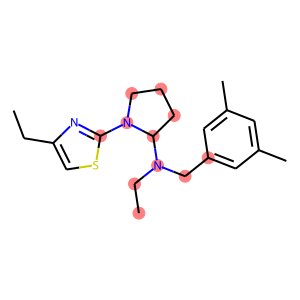

In [29]:
from rdkit import Chem
from rdkit.Chem import Draw

# 输入分子
frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")

# 获取匹配
frag_atoms = set(range(frag.GetNumAtoms()))
link_atoms = set(range(link.GetNumAtoms()))
matches = mol.GetSubstructMatches(link)

# 创建分子图
mol_with_highlights = Chem.MolFromSmiles(Chem.MolToSmiles(mol))  # 复制分子
highlight_atoms = []  # 存储要高亮显示的原子索引

for match in matches:
    highlight_atoms.extend([atom.GetIdx() for atom in mol_with_highlights.GetAtoms() if atom.GetIdx() in match])

# 在分子图中标记出原子
# Draw.MolToImage(mol_with_highlights, size=(300, 300), wedgeBonds=True, highlightAtoms=highlight_atoms)
img = Draw.MolToImage(mol_with_highlights, size=(300, 300), wedgeBonds=True, highlightAtoms=highlight_atoms, kekulize=True, atomLabels=[atom.GetIdx() for atom in mol_with_highlights.GetAtoms()], showAtomNumbers=True)
img.show()

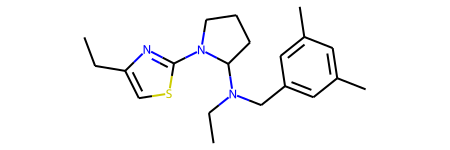

In [14]:
frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")

frag
link
mol

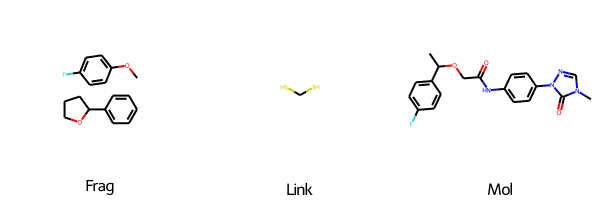

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw

# 输入分子
frag = Chem.MolFromSmiles("C1CCOC1c1ccccc1.c1cc(F)ccc1OC")
link = Chem.MolFromSmiles("SCS")
mol = Chem.MolFromSmiles("CC(OCC(=O)NC1=CC=C(N2N=CN(C)C2=O)C=C1)C1=CC=C(F)C=C1")

# 将分子存储在列表中
molecules = [frag, link, mol]

# 使用MolsToGridImage函数可视化多个分子
img = Draw.MolsToGridImage(molecules, molsPerRow=3, subImgSize=(200, 200), legends=["Frag", "Link", "Mol"])
img

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image

frag = Chem.MolFromSmiles("C1CCN(c2nc(CC)cs2)C1.Cc1cccc(C)c1")
link = Chem.MolFromSmiles("CCNC")
mol = Chem.MolFromSmiles("CCC1=CSC(N2CCCC2N(CC)CC2=CC(C)=CC(C)=C2)=N1")

img1 = Draw.MolToImage(mol, size=(200,200))
img2 = Draw.MolToImage(link, size=(200,200))
img3 = Draw.MolToImage(frag, size=(200,200))

width = img1.width + img2.width + img3.width  
height = img1.height 

merged_img = Image.new('RGB', (width, height))

merged_img.paste(img1, (0, 0))
merged_img.paste(img2, (img1.width, 0))
merged_img.paste(img3, (img1.width+ img2.width, 0))

# merged_img.save("merged_image.png")
merged_img.show()  # 显示图像

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [3]:
import os
from rdkit import Chem
from tqdm import tqdm

sdf_path = os.path.join('sample1', 'pred_mols.sdf')
supplier = Chem.SDMolSupplier(sdf_path)
supplier = tqdm(supplier, total=len(supplier)) 
molnamelist = []

for mol in supplier:
        if mol is None:
            continue 
        Chem.SanitizeMol(mol)
        Chem.Kekulize(mol, clearAromaticFlags=True)

        mol_smi = Chem.MolToSmiles(mol)
        mol.SetProp('_Name', mol_smi)
        mol_name = mol.GetProp('_Name')
        molnamelist.append(mol_name)

molnamelist

  0%|          | 0/21 [00:00<?, ?it/s][16:04:36] Explicit valence for atom # 24 C, 5, is greater than permitted
[16:04:36] ERROR: Could not sanitize molecule ending on line 750
[16:04:36] ERROR: Explicit valence for atom # 24 C, 5, is greater than permitted
100%|██████████| 21/21 [00:00<00:00, 1313.50it/s]


['[C]C1=[C]C([C])=[C]C([C]N([C])[C]2[C][C][C]N2C2=NC([C])=[C]S2)=[C]1',
 '[C][C][C]N([C]C1=[C]C([C])=[C]C([C])=[C]1)[C]1[C][C][C]N1C1=NC([C])=[C]S1',
 '[C]C1=[C][C]=C([C][C][N]C(=O)[N][C][C][C]O[C]N2[C][C][C][C]2)C([C])=[C]1',
 '[C]C1=[C][C]=C([C][C][N]C(=O)[N][C][C][C][N][C]N2[C][C][C][C]2)C([C])=[C]1',
 '[C][C]C1=[C]SC(N2[C][C][C][C]2[C]([C])[C]([C])C2=[C]C([C])=[C]C([C])=[C]2)=N1',
 '[C][C]C1=[C]SC(N2[C][C][C][C]2N([C][C])[C]C2=[C]C([C])=[C]C([C])=[C]2)=N1',
 '[C][C]C1=[C][C]=[C][C]=C1C(=O)N1[C][C][C]N(O[C]([C])[C][C]([C])[C])[C]1',
 '[C][C]C1=[C][C]=[C][C]=C1[N]C#C[C]O[C]([C])[C][C]([C])[C]',
 '[C]C1=[C][C]=C([C][C]O[C][C][N]N2[C]=[C]S[C]2N2[C][C][C][C]2)C([C])=[C]1',
 '[C]C1=[C][C]=C([C][C][C][N][C][N]N2[C]=[C]S[C]2N2[C][C][C][C]2)C([C])=[C]1',
 'O=C1[C]N(S(=O)(=O)C2=[C][C]=[C]C([N]C(=O)C3=[C]C(F)=[C]C(F)=[C]3)=[C]2)[C][C][N]1',
 'O=C1[C]N(S(=O)(=O)C2=[C][C]=[C]C([N]C(=O)C3=[C]C(F)=[C]C(F)=[C]3)=[C]2)[C][C][N]1',
 '[C]C1=[C][C]=C([C][C][C][C][N][C][C]C2=[C]SC(N3[C][C][C][C]3)=N2)C

In [6]:
import argparse
import itertools
import numpy as np
import pandas as pd

from rdkit import Chem, Geometry
from tqdm import tqdm

from pdb import set_trace


def get_exits(mol):
    """
    Returns atoms marked as exits in DeLinker data
    """
    exits = []
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol == '*':
            exits.append(atom)
    return exits


def set_anchor_flags(mol, anchor_idx):
    """
    Sets property _Anchor to all atoms in a molecule
    """
    for atom in mol.GetAtoms():
        if atom.GetIdx() == anchor_idx:
            atom.SetProp('_Anchor', '1')
        else:
            atom.SetProp('_Anchor', '0')


def get_anchors_idx(mol):
    anchors_idx = []
    for atom in mol.GetAtoms():
        if atom.GetProp('_Anchor') == '1':
            anchors_idx.append(atom.GetIdx())

    return anchors_idx


def update_fragment(frag):
    """
    Removes exit atoms with corresponding bonds and sets _Anchor property
    """
    exits = get_exits(frag)
    if len(exits) > 1:
        raise Exception('Found more than one exits in fragment')
    exit = exits[0]

    bonds = exit.GetBonds()
    if len(bonds) > 1:
        raise Exception('Exit atom has more than 1 bond')
    bond = bonds[0]

    exit_idx = exit.GetIdx()
    source_idx = bond.GetBeginAtomIdx()
    target_idx = bond.GetEndAtomIdx()
    anchor_idx = source_idx if target_idx == exit_idx else target_idx
    print(f"idxes= {source_idx, target_idx, anchor_idx}")
    set_anchor_flags(frag, anchor_idx)

    efragment = Chem.EditableMol(frag)
    efragment.RemoveBond(source_idx, target_idx)
    efragment.RemoveAtom(exit_idx)

    return efragment.GetMol()

mol_smi = 'CCC(OC1=CC(C)=CC(C)=C1C)C1CCCN1C1=NC(C)=CS1'
frag1_smi = 'Cc1ccc(C)cc1C*'
frag2_smi = '*c1csc(N2CCCC2)n1'

mol = Chem.MolFromSmiles(mol_smi)
frag1 = Chem.MolFromSmiles(frag1_smi)
frag2 = Chem.MolFromSmiles(frag2_smi)


# exits = get_exits(frag1)
# # exits_idx = exits.GetIdx()
# exits_smi = exits[0].GetSymbol()

# # exits, exits_idx

# exits_smi

newfrag1 = update_fragment(frag1)
newfrag2 = update_fragment(frag2)

newfrag1_idx = get_anchors_idx(newfrag1)
newfrag2_idx = get_anchors_idx(newfrag2)

print(f'newfrag1_idx, newfrag2_idx = {newfrag1_idx, newfrag2_idx}')

idxes= (8, 9, 8)


[20:03:25] Can't kekulize mol.  Unkekulized atoms: 0 1 3


AttributeError: 'NoneType' object has no attribute 'GetAtoms'

In [1]:
matches = mol.GetSubstructMatches(frag)
if len(matches) < 1:
    raise Exception('Could not find fragment or linker matches')

match2conf = {}
for match in matches:
    mol_coords = mol.GetConformer().GetPositions()
    frag_coords = mol_coords[np.array(match)]
    frag_conformer = create_conformer(frag_coords)
    match2conf[match] = frag_conformer

NameError: name 'argparse' is not defined